# 안녕하세요^^ 
## AIVLE 2차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정 3번 파일입니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## [프로젝트 흐름]

0.튜토리얼에서 주민등록 데이터를 함께 전처리/체험 해 봅니다.

1.서울시 버스 정류장 데이터를 전처리/분석 합니다.

2.서울시 유동인구 데이터를 전처리/분석 합니다.

### 3.서울시 주민등록 데이터를 전처리/분석 합니다.

4.서울시 업종등록 데이터를 전처리/분석 합니다.

5.위 4개 데이터를 합쳐서 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

---


# 데이터 분석부터 먼저 시작해보겠습니다.
### "구별 등록인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.0 주민등록 데이터.csv

[데이터 소개]
* 서울 시 주민 등록 데이터

[변수 소개]
* 한국인 / 등록 외국인 / 합계 / 세대수 / 고령인구수

# 1.데이터 불러오기
### 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* '1.0 주민등록 데이터.csv'파일을 'seoul_people' 변수에 저장하고 그 Shape을 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_people = pd.read_csv('rawdata/1.0 주민등록 데이터.csv',sep="\t", encoding = 'cp949')

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_people.shape

(26, 6)

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* '1.0 주민등록 데이터' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   동별(1)     26 non-null     object
 1   동별(2)     26 non-null     object
 2   소계        26 non-null     int64 
 3   남자        26 non-null     int64 
 4   여자        26 non-null     int64 
 5   65세이상고령인  26 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ KB


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.describe()


,소계,남자,여자,65세이상고령인
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,7.252594e+05,3.515422e+05,3.737172e+05,1.282624e+05
std,1.779455e+06,8.624960e+05,9.169688e+05,3.145440e+05
min,1.204370e+05,5.856300e+04,6.187400e+04,2.505500e+04
25%,3.076762e+05,1.472115e+05,1.603522e+05,5.593450e+04
50%,3.829570e+05,1.870985e+05,1.961735e+05,6.761450e+04
75%,4.650762e+05,2.245638e+05,2.402145e+05,8.087125e+04
max,9.428372e+06,4.570048e+06,4.858324e+06,1.667411e+06


In [6]:
seoul_people.head()

,동별(1),동별(2),소계,남자,여자,65세이상고령인
0,합계,소계,9428372,4570048,4858324,1667411
1,합계,종로구,141379,68395,72984,27958
2,합계,중구,120437,58563,61874,25055
3,합계,용산구,218650,105087,113563,39037
4,합계,성동구,281000,136633,144367,47720


In [7]:
seoul_people.tail()

,동별(1),동별(2),소계,남자,여자,65세이상고령인
21,합계,관악구,486752,244748,242004,82447
22,합계,서초구,404325,193159,211166,62347
23,합계,강남구,529102,253072,276030,81715
24,합계,송파구,658801,317180,341621,103573
25,합계,강동구,460067,225221,234846,78340


#### [실습문제3] 데이터 확인 및 처리

* head 와 tail 을 보았을때, 어느 데이터만 가져와야 할지 생각 해 봅시다.

In [8]:
seoul_people = pd.read_csv('rawdata/1.0 주민등록 데이터.csv', sep="\t", encoding = "cp949")
seoul_people

,동별(1),동별(2),소계,남자,여자,65세이상고령인
0,합계,소계,9428372,4570048,4858324,1667411
1,합계,종로구,141379,68395,72984,27958
2,합계,중구,120437,58563,61874,25055
3,합계,용산구,218650,105087,113563,39037
4,합계,성동구,281000,136633,144367,47720
5,합계,광진구,337416,162541,174875,54071
6,합계,동대문구,336644,165755,170889,64468
7,합계,중랑구,385318,189537,195781,74920
8,합계,성북구,430397,206961,223436,77475
9,합계,강북구,293660,142567,151093,66307


In [9]:
seoul_people = seoul_people[['동별(2)', '소계', '남자', '여자', '65세이상고령인']]
seoul_people = seoul_people.drop(0)
seoul_people

,동별(2),소계,남자,여자,65세이상고령인
1,종로구,141379,68395,72984,27958
2,중구,120437,58563,61874,25055
3,용산구,218650,105087,113563,39037
4,성동구,281000,136633,144367,47720
5,광진구,337416,162541,174875,54071
6,동대문구,336644,165755,170889,64468
7,중랑구,385318,189537,195781,74920
8,성북구,430397,206961,223436,77475
9,강북구,293660,142567,151093,66307
10,도봉구,311694,151398,160296,66998


In [10]:
# 해당 데이터프레임을 'df_seoul_people.csv' 파일로 저장하세요.

seoul_people.to_csv("df_seoul_people.csv", index = False)

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [11]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people = seoul_people.loc[1::]

In [ ]:
# 전체 소계 - 노인의 비율 확인

In [18]:
# 남녀차이
seoul_people['남녀차이'] = seoul_people['남자'] - seoul_people['여자']

C:\Users\82107\AppData\Local\Temp\ipykernel_1584\2700719621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_people['남녀차이'] = seoul_people['남자'] - seoul_people['여자']


<AxesSubplot:xlabel='동별(2)', ylabel='남녀차이'>

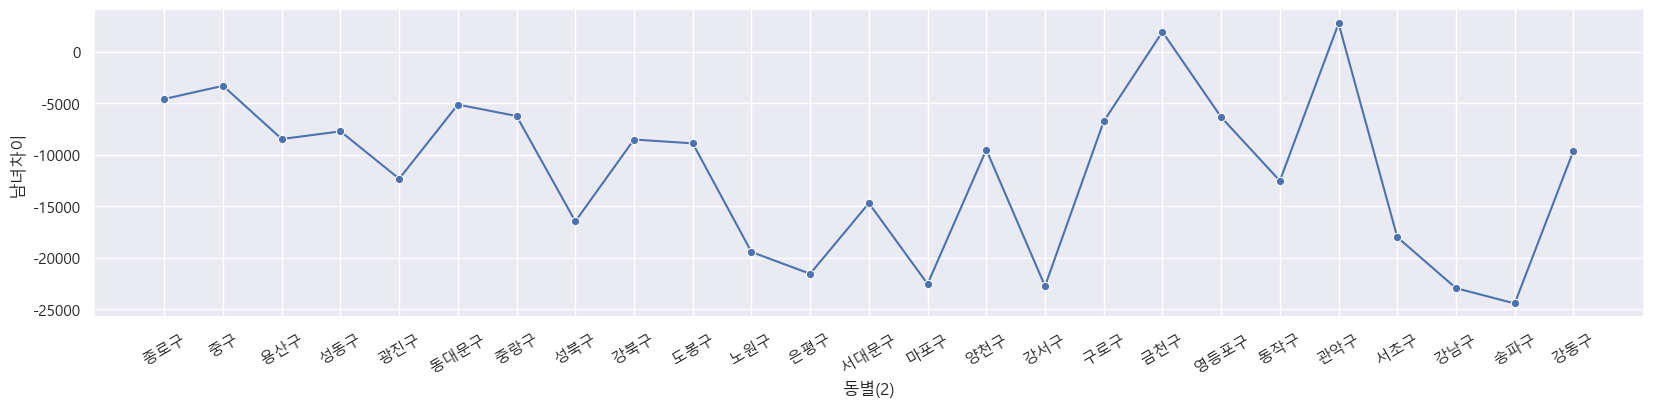

In [22]:
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = seoul_people, marker = 'o', x= '동별(2)', y='남녀차이')

<AxesSubplot:xlabel='동별(2)', ylabel='65세이상고령인'>

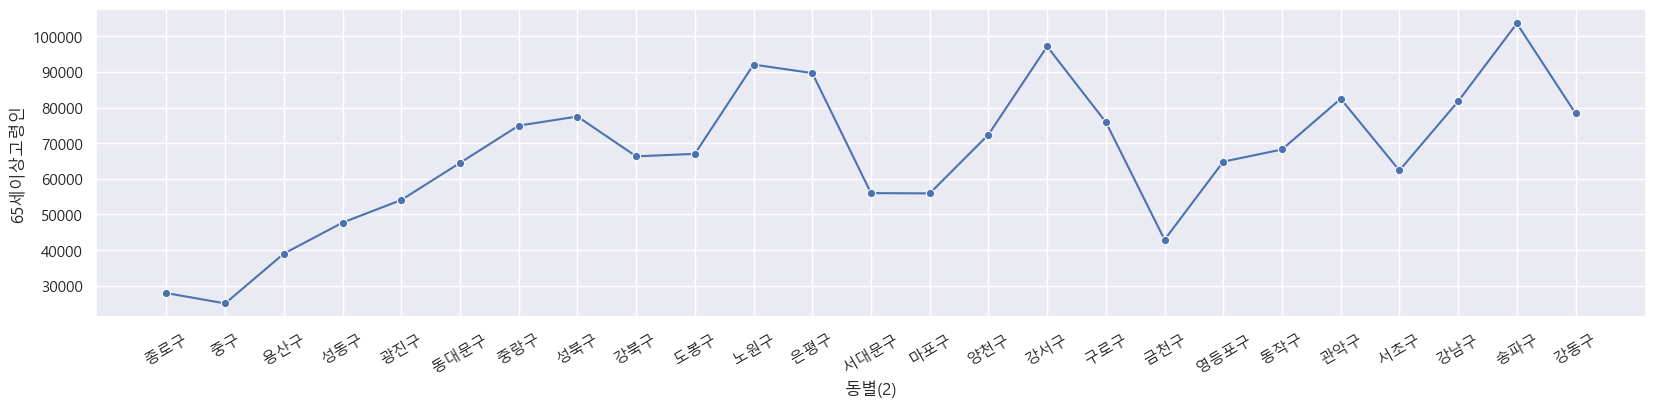

In [23]:
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = seoul_people,  marker = 'o',x= '동별(2)', y='65세이상고령인')

In [21]:
# 위 차트들을 통해 알게된 사실을 정리해봅시다.

# 1. 남 녀의 총합은 9428372이다.

# 2. 금천구 / 서초구의 경우 남자가 여자보다 많았으며, 송파구의 경우 여자와 남자의 차이가 가장 많이 나는 것으로 파악된다.

# 3. 65세이상고령인의 경우 중구에서 가장 적었으며, 송파구에서 가장 많았다.

In [13]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---